# Index

1. Import statements
2. Data Read
3. Some basic info about data
4. Duplicate Columns Analysis
5. Null Values Analysis
6. HeatMap
7. Analyse Variance Inflation Factor (VIF)
8. Plots and Distribution
9. Outliers Analysis - Boxplot, Z-score
10. train-test-split
11. Scalling
12. Logistic Regression
13. Decision Tree
14. Random Forest
15. K-Nearest Neighbour (KNN)
16. Naive Bias
17. Support Vector Analysis (SVM)
18. Analysis of each ML Model

## 1. Import statements

In [1]:
# imports statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2. Data Read

In [2]:
# Reading the data set
wine_data_set = pd.read_csv('QualityPrediction.csv')
wine_data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### As per the problem statement quality is our target variable. Since, predictor and target variables are present it is supervised problem and the quantity is categorical type so classification problem is needed

## 3. Some basic info about data

In [3]:
# Shape of the data set
wine_data_set.shape

(1599, 12)

In [4]:
# info about dataset - columns, their type
wine_data_set.info()

# Inference: All columns are of numeric type so no encoding is needed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Basics stats
basic_stats = wine_data_set.describe()
basic_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Adding to more metrics w.r.t to z-score for max values to check if there is any outliers present for the features.
# Basicly a shortlisting step, which indicated which feature to select for outlier analysis
basic_stats.loc['z_max_score'] = abs(basic_stats.loc['mean',:] - basic_stats.loc['max',:])/basic_stats.loc['std',:]
basic_stats.loc['z_min_score'] = abs(basic_stats.loc['mean',:] - basic_stats.loc['min',:])/basic_stats.loc['std',:]
basic_stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
z_max_score,4.353787,5.876138,3.742403,9.192806,11.123555,5.365606,7.372847,3.678904,4.526866,7.916200,4.201138,2.927275
z_min_score,2.136377,2.277567,1.391037,1.162333,1.603443,1.422055,1.230199,3.537625,3.699244,1.935902,1.898325,3.264143


#### Inference: 'chlorides', 'residual sugar',  'total sulfur dioxide' ,'sulphates' 'free sulfur dioxide' and 'volatile acidity' has higher chances of the presence of outliers

## 4. Duplicate Columns Analysis

In [3]:
# No od duplicated records
wine_data_set.duplicated().sum()

240

In [4]:
# removing the duplicates records
preprocessed_wine_data = wine_data_set.drop_duplicates()
print(preprocessed_wine_data.shape) # no of records reduced from 1599 to 1359
print(preprocessed_wine_data.duplicated().sum())

(1359, 12)
0


## 5. Null Values Analysis

In [9]:
# number of null counts
preprocessed_wine_data.isna().sum()
# Inference: No null values are there so no null handling needed

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 6. HeatMap

In [10]:
corr_matrix = preprocessed_wine_data.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


##### This method getFilteredThreshold() returns the correlation values greater than threshold. For other it is reduced to 0

In [11]:
def getFilteredThreshold(data,threshold):
    filtered_corr_mat = pd.DataFrame(columns=data.columns)
    corr_mat = data.corr()
    for i in corr_mat.columns:
        for j in corr_mat.index:
            if i != j and abs(corr_mat[i][j]) >= threshold:
                filtered_corr_mat.loc[i,j] = corr_mat[i][j]
    cols_to_drop = [i for i in filtered_corr_mat.columns if i not in filtered_corr_mat.index]
    filtered_corr_mat.drop(columns=cols_to_drop,axis=1,inplace=True)
    filtered_corr_mat.fillna(0,inplace=True)
    return filtered_corr_mat

In [12]:
filtered_corr_mat = getFilteredThreshold(preprocessed_wine_data, 0.35)

<AxesSubplot:>

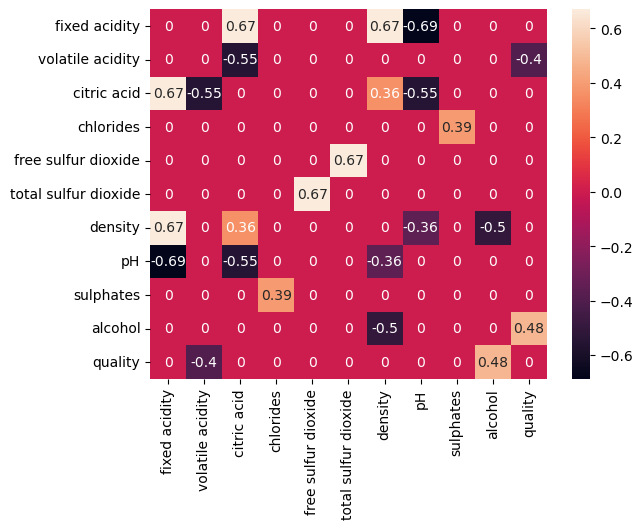

In [13]:
sns.heatmap(filtered_corr_mat, annot=True)

#### Analysis:
1. Only "volatile acidity" and "alcohol" has better correlation with target feature (quality) than other features
2. "fixed acidity" has higher correlation with "Citric acid","density" and "pH". So these are related
3. Since lower the pH value higher the acidic nature. This relationship is clearly illustrated with the correation b/w "fixed acidity" and "pH"
4. It seems the "free sulphur dioxide" largely contribute the "total sulfur dioxide",  which is show in correlation matrix
5. Overrall, predictor variables are related (or dependent) on each other. Hence, multi-collinearity is higher.
6. From the above heatmap, I have filtered out some features which seems to be important or having higher weight and can explain others features. So, I am selecting "volatile acidity", "total sulfur dioxide", "density", "pH", "alcohol" and "sulphates" to run a round of logistic regression on them.

## 7. Analyse Variance Inflation Factor (VIF)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(index=[i for i in preprocessed_wine_data.columns if i != 'quality'], columns=['vif'])

In [15]:
# variance_inflation_factor calculation
vif['vif'] =[variance_inflation_factor(preprocessed_wine_data.drop('quality', axis=1), i) for i in range(0,len(vif))]

In [16]:
vif['is_multi-collinear'] = vif['vif']>5
vif

,vif,is_multi-collinear
fixed acidity,75.023032,True
volatile acidity,16.460387,True
citric acid,9.188892,True
residual sugar,4.915733,False
chlorides,6.349793,True
free sulfur dioxide,6.432241,True
total sulfur dioxide,6.543918,True
density,1500.387873,True
pH,1095.732046,True
sulphates,21.946341,True


#### Conclusion: High multi colinearlity among predictor variables. So all features can't be used for linear models

## 8. Plots and Distribution

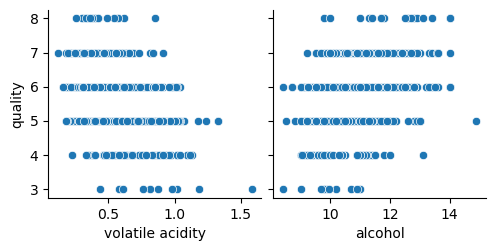

In [17]:
sns.pairplot(y_vars= 'quality', x_vars= ['volatile acidity', 'alcohol'], data=preprocessed_wine_data)
plt.show()

## 9. Outliers Analysis - Boxplot, Z-score
From section 3,  we found that columns 'chlorides', 'residual sugar', 'total sulfur dioxide' ,'sulphates' 'free sulfur dioxide' and 'volatile acidity' has higher chances of the presence of outliers.
So, doing outliers analysis for these only

<AxesSubplot:xlabel='chlorides'>

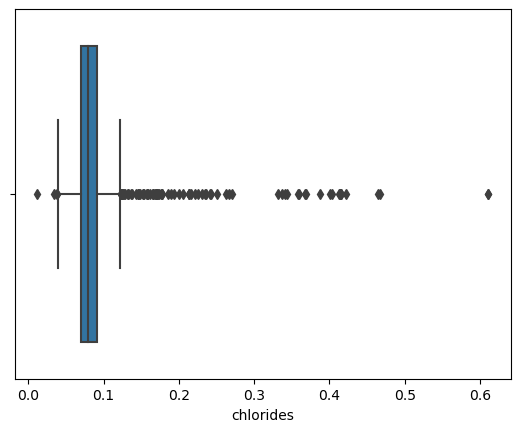

In [18]:
sns.boxplot(data = preprocessed_wine_data, x = 'chlorides')

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

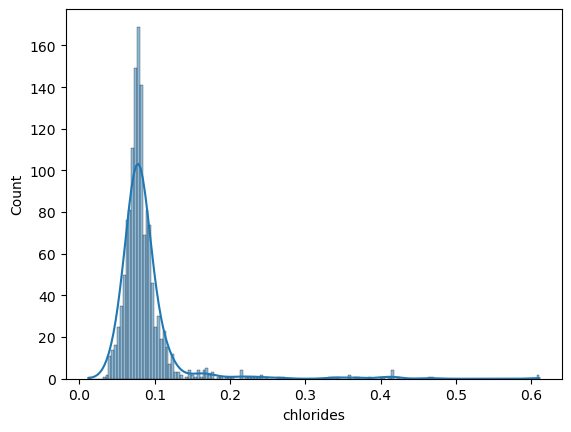

In [19]:
sns.histplot(data=preprocessed_wine_data, x = 'chlorides', kde='kde')

Inference: Distribution is skewed due to presence of some outliers

<AxesSubplot:xlabel='residual sugar'>

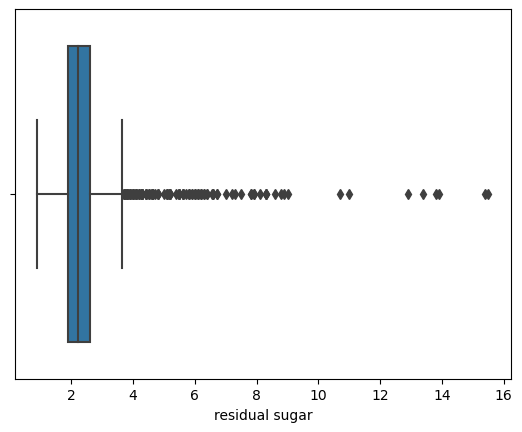

In [20]:
sns.boxplot(data = preprocessed_wine_data, x = 'residual sugar')

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

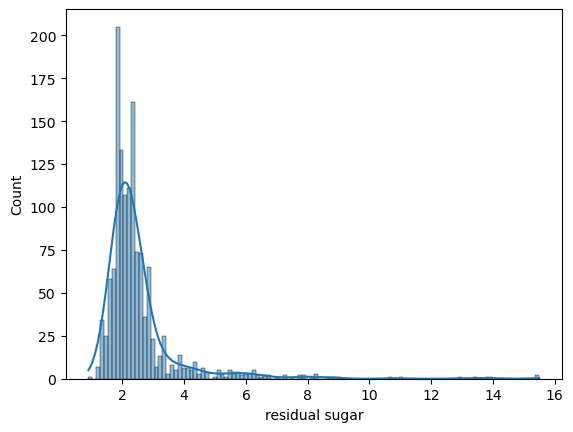

In [21]:
sns.histplot(kde='kde',data = preprocessed_wine_data, x = 'residual sugar')

Inference: Distribution is skewed due to presence of some outliers

<AxesSubplot:xlabel='density'>

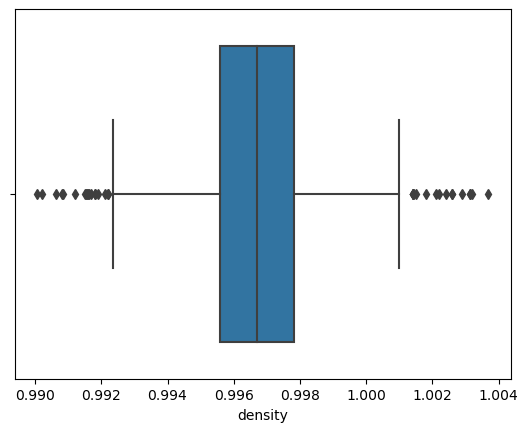

In [22]:
sns.boxplot(data = preprocessed_wine_data, x = 'density')

<AxesSubplot:xlabel='density', ylabel='Count'>

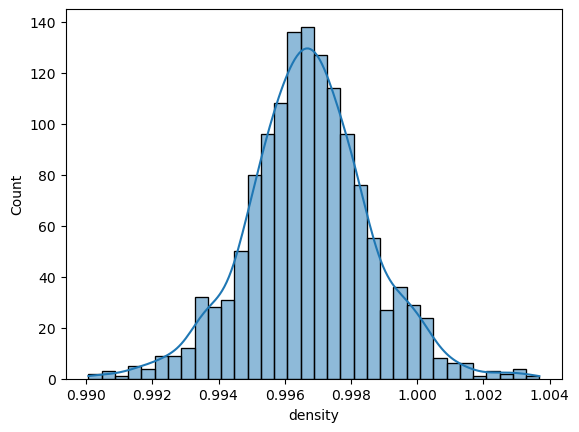

In [23]:
sns.histplot(kde='kde',data = preprocessed_wine_data, x = 'density')

Inference: Distribution is similar to normally distributed curve

In [24]:
def iqr_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    return [i for i in data if i<lb or i>ub]

In [25]:
def z_score_outliers(data, threshold=3):
    x_bar = np.mean(data)
    std = np.std(data)
    return [i for i in data if abs((x_bar-i)/std) > 3]

In [27]:
outliers_info = pd.DataFrame(columns=preprocessed_wine_data.columns)
no_rec = preprocessed_wine_data.shape[0]
for i in outliers_info.columns:
    outliers_info.loc['iqr_outlier_counts',i] = len(iqr_outliers(preprocessed_wine_data.loc[:,i]))
    outliers_info.loc['iqr_outliers_perc',i] = outliers_info.loc['iqr_outlier_counts',i]*100/no_rec
    outliers_info.loc['z_score_outlier_counts',i] = len(z_score_outliers(preprocessed_wine_data.loc[:,i]))
    outliers_info.loc['z_score_outliers_prec',i] = outliers_info.loc['z_score_outlier_counts',i] * 100 / no_rec
outliers_info

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
iqr_outlier_counts,41,19,1,126,87,26,45,35,28,55,12,27
iqr_outliers_perc,3.016924,1.398087,0.073584,9.271523,6.401766,1.913171,3.311258,2.575423,2.060338,4.047093,0.883002,1.986755
z_score_outlier_counts,9,9,1,28,27,18,12,13,8,21,7,10
z_score_outliers_prec,0.662252,0.662252,0.073584,2.060338,1.986755,1.324503,0.883002,0.956586,0.588668,1.545254,0.515085,0.735835


#### From above table, we can say outliers percentage is low so we will not prefer robust scaling. 

## 10. train-test-split

In [5]:
y = preprocessed_wine_data['quality']
x = preprocessed_wine_data.drop('quality', axis=1)

In [6]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=108)

## 11. Scalling

In [7]:
ss = preprocessing.StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

## 12. Logistic Regression

In [9]:
# Creating a DataFrame to record accuracy of each model tried
models_analysis = pd.DataFrame(columns=['accuracy','weighted_precision_avg','weighted_recall_avg','weighted_f1_score_avg'])

In [10]:
log_reg = LogisticRegression(random_state=108)

In [11]:
log_reg_hyper_param = [    
    {'penalty' : ['l1', 'l2', 'elasticnet','none'],
    'C' : np.logspace(-4, 4, 20),
     'multi_class' : ['auto', 'ovr', 'multinomial'],
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [500, 750, 350]
    }
]
log_gsc = GridSearchCV(log_reg, param_grid = log_reg_hyper_param, cv = 9,verbose=True, n_jobs=-1, scoring='accuracy')
log_gsc.fit(x_train_scaled,y_train)

Fitting 9 folds for each of 2160 candidates, totalling 19440 fits


C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10800 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
   

GridSearchCV(cv=9, estimator=LogisticRegression(random_state=108), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [500, 750, 350],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear']}],
             scoring='accuracy', verbose=True)

In [12]:
log_gsc.best_params_

{'C': 0.08858667904100823,
 'max_iter': 500,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [13]:
# C = 0.23357214690901212 from previous hypertunnung is berforming better
log_reg = LogisticRegression(penalty='l2', C=0.08858667904100823,solver='lbfgs',max_iter=500,
                             random_state=108,multi_class='auto')
log_reg.fit(x_train_scaled,y_train)
y_pred_log_reg = log_reg.predict(x_test_scaled)

In [14]:
classification_matrix = metrics.classification_report(y_test,y_pred_log_reg,output_dict=True)
models_analysis.loc['log_reg_hyper_params',:] = [metrics.accuracy_score(y_test,y_pred=y_pred_log_reg),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778


### Logistic regression with columns - "volatile acidity", "total sulfur dioxide", "density", "pH", "alcohol" and "sulphates"

In [15]:
my_filtered_ds = preprocessed_wine_data.loc[:,["volatile acidity", "total sulfur dioxide", "density", "pH", "alcohol","sulphates",'quality']]
my_filtered_ds

,volatile acidity,total sulfur dioxide,density,pH,alcohol,sulphates,quality
0,0.700,34.0,0.99780,3.51,9.4,0.56,5
1,0.880,67.0,0.99680,3.20,9.8,0.68,5
2,0.760,54.0,0.99700,3.26,9.8,0.65,5
3,0.280,60.0,0.99800,3.16,9.8,0.58,6
5,0.660,40.0,0.99780,3.51,9.4,0.56,5
...,...,...,...,...,...,...,...
1593,0.620,38.0,0.99651,3.42,9.5,0.82,6
1594,0.600,44.0,0.99490,3.45,10.5,0.58,5
1595,0.550,51.0,0.99512,3.52,11.2,0.76,6
1597,0.645,44.0,0.99547,3.57,10.2,0.71,5


<AxesSubplot:>

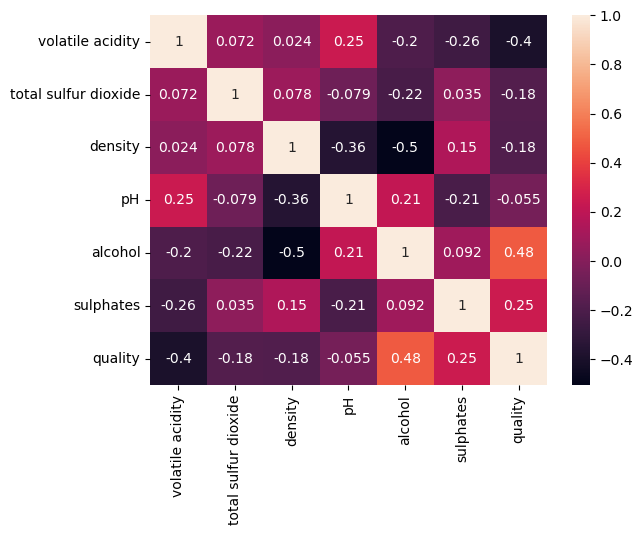

In [48]:
sns.heatmap(my_filtered_ds.corr(),annot=True)

Now we got less correlated data with reduced features

In [16]:
my_x = my_filtered_ds.drop('quality',axis=1)
my_y = my_filtered_ds['quality']
my_x_train,my_x_test,my_y_train,my_y_test = train_test_split(my_x,my_y,test_size=0.2,random_state=108)

In [17]:
ss_new = preprocessing.StandardScaler()
my_x_trained_scaled = ss_new.fit_transform(my_x_train)
my_x_test_scaled = ss_new.transform(my_x_test)

In [18]:
my_log_reg = LogisticRegression(random_state=108)
log_reg_hyper_param = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
     'multi_class' : ['auto', 'ovr', 'multinomial'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear'],
    'max_iter' : [500, 750, 1000]
    }
]
log_gsc = GridSearchCV(my_log_reg, param_grid = log_reg_hyper_param, cv = 10,verbose=True, n_jobs=-1, scoring='accuracy')
log_gsc.fit(my_x_trained_scaled,my_y_train)

Fitting 10 folds for each of 1620 candidates, totalling 16200 fits


C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10200 fits failed out of a total of 16200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
  

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=108), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [500, 750, 1000],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear']}],
             scoring='accuracy', verbose=True)

In [19]:
log_gsc.best_params_

{'C': 0.23357214690901212,
 'max_iter': 500,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [20]:
my_log_reg = LogisticRegression(random_state=108,C=0.23357214690901212,solver='lbfgs',multi_class= 'auto',max_iter=500)
my_log_reg.fit(my_x_trained_scaled,my_y_train)
my_y_log_reg_pred = my_log_reg.predict(my_x_test_scaled)

In [21]:
classification_matrix = metrics.classification_report(y_test,my_y_log_reg_pred,output_dict=True)
models_analysis.loc['my_filtered_log_reg',:] = [metrics.accuracy_score(y_test,my_y_log_reg_pred),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778
my_filtered_log_reg,0.573529,0.53449,0.573529,0.549476


Conclusion: Filtered param performed even poorer, due to loss of info.

### Conclusion:  Logistic Regression couldn't performed better because of high multicolinearity in predictor variables

## 13. Decision Tree

In [22]:
dt = DecisionTreeClassifier(random_state=108)
dt_hyper_params = [{'criterion':['gini','entropy'],
                    'max_features': ['auto', 'sqrt', 'log2', None],
                   'max_depth':[i for i in range(2,9)]}]
dt_gcv = GridSearchCV(dt,param_grid=dt_hyper_params,cv=9,verbose=3,n_jobs=-1)
dt_gcv.fit(x_train,y_train)

Fitting 9 folds for each of 56 candidates, totalling 504 fits


C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=9.
  warnings.warn(


GridSearchCV(cv=9, estimator=DecisionTreeClassifier(random_state=108),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, 7, 8],
                          'max_features': ['auto', 'sqrt', 'log2', None]}],
             verbose=3)

In [23]:
dt_gcv.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}

In [24]:
dt_best = DecisionTreeClassifier(random_state=108,max_depth=4,max_features='auto')
dt_best.fit(x_train,y_train)
y_pred_dt = dt_best.predict(x_test)

In [25]:
classification_matrix = metrics.classification_report(y_test,y_pred_dt,output_dict=True)
models_analysis.loc['decision_tree',:] = [metrics.accuracy_score(y_test,y_pred_dt),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778
my_filtered_log_reg,0.573529,0.53449,0.573529,0.549476
decision_tree,0.485294,0.469652,0.485294,0.469839


## 14. Random Forest

In [26]:
rf = RandomForestClassifier(random_state=108)
param_dist = {'max_depth': [i for i in range(2,9)],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'oob_score': [True,False],
              'criterion': ['gini', 'entropy']}

rf_gcv = GridSearchCV(rf, cv = 9,
                     param_grid=param_dist, verbose = 3,
                     n_jobs = -1)

rf_gcv.fit(x_train,y_train)

Fitting 9 folds for each of 224 candidates, totalling 2016 fits


C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=9.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
504 fits failed out of a total of 2016.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
504 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise Valu

GridSearchCV(cv=9, estimator=RandomForestClassifier(random_state=108),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'oob_score': [True, False]},
             verbose=3)

In [27]:
rf_gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'oob_score': True}

In [28]:
# criterion='entropy', max_depth=7 from previous hypertuning provides better results
rf_best = RandomForestClassifier(random_state=108, bootstrap=True, criterion='gini', max_depth=7,max_features='auto', 
                                 oob_score=True)
rf_best.fit(x_train,y_train)
y_pred_rf = rf_best.predict(x_test)

In [29]:
classification_matrix = metrics.classification_report(y_test,y_pred_rf,output_dict=True)
models_analysis.loc['random_forest',:] = [metrics.accuracy_score(y_test,y_pred_rf),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778
my_filtered_log_reg,0.573529,0.53449,0.573529,0.549476
decision_tree,0.485294,0.469652,0.485294,0.469839
random_forest,0.591912,0.55937,0.591912,0.568826


## 15. K-Nearest Neighbour (KNN)

In [30]:
accuracy_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_train_scaled,y_train,cv=10) #10 accuracy values..take their mean
    accuracy_rate.append(score.mean())

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this be

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Text(0, 0.5, 'Accuracy Rate')

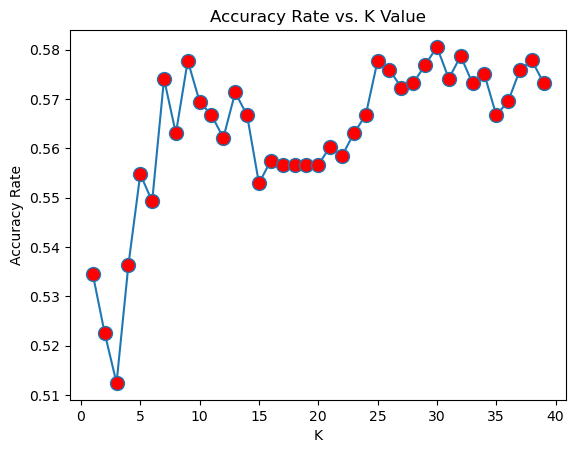

In [73]:
plt.plot(range(1,40),accuracy_rate, marker='o',markerfacecolor='red', markersize=10)

plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [31]:
knn_param_dist = {'n_neighbors': [i for i in range(15,35)],
              'weights': ['uniform', 'distance'],
                'p' : [i for i in range(2,5)]}

knn_gcv = GridSearchCV(knn, cv = 10,
                     param_grid=knn_param_dist, verbose = 3,
                     n_jobs = -1)

knn_gcv.fit(x_train_scaled,y_train)

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=39), n_jobs=-1,
             param_grid={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                         25, 26, 27, 28, 29, 30, 31, 32, 33,
                                         34],
                         'p': [2, 3, 4], 'weights': ['uniform', 'distance']},
             verbose=3)

In [32]:
knn_gcv.best_params_

{'n_neighbors': 32, 'p': 4, 'weights': 'distance'}

In [33]:
knn = KNeighborsClassifier(n_neighbors=32,p=4,weights='distance')
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)

In [34]:
classification_matrix = metrics.classification_report(y_test,y_pred_knn,output_dict=True)
models_analysis.loc['K-nearest Neighbor',:] = [metrics.accuracy_score(y_test,y_pred_knn),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778
my_filtered_log_reg,0.573529,0.53449,0.573529,0.549476
decision_tree,0.485294,0.469652,0.485294,0.469839
random_forest,0.591912,0.55937,0.591912,0.568826
K-nearest Neighbor,0.569853,0.538344,0.569853,0.548882


## 16. Naive Bias
Should not perform well  as data is not independent. Acidity depends on pH and other as seen in corelation matrix

In [35]:
gausianNaive = GaussianNB()
gausianNaive.fit(x_train, y_train)
y_pred_naive = gausianNaive.predict(x_test)

In [36]:
classification_matrix = metrics.classification_report(y_test,y_pred_naive,output_dict=True)
models_analysis.loc['Naive Bias',:] = [metrics.accuracy_score(y_test,y_pred_naive),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778
my_filtered_log_reg,0.573529,0.53449,0.573529,0.549476
decision_tree,0.485294,0.469652,0.485294,0.469839
random_forest,0.591912,0.55937,0.591912,0.568826
K-nearest Neighbor,0.569853,0.538344,0.569853,0.548882
Naive Bias,0.529412,0.536621,0.529412,0.532741


## 17. Support Vector Analysis (SVM)

In [37]:
svc = SVC(random_state=108)

In [38]:
svm_hyper_parameter = {'C': [0.1, 1, 10, 100],      
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear','rbf','poly']}

gsv_svm = GridSearchCV(svc,svm_hyper_parameter,cv=5,scoring='accuracy', 
                         verbose = 3, n_jobs = -1)
gsv_svm.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVC(random_state=108), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [39]:
gsv_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [40]:
svc = SVC(kernel='rbf',C=1,gamma=0.1,random_state=108)
svc.fit(x_train_scaled,y_train)
y_pred_svm = svc.predict(x_test_scaled)

In [41]:
classification_matrix = metrics.classification_report(y_test,y_pred_svm,output_dict=True)
models_analysis.loc['Support Vector Machine',:] = [metrics.accuracy_score(y_test,y_pred_svm),
classification_matrix['weighted avg']['precision'],classification_matrix['weighted avg']['recall'],
                                                          classification_matrix['weighted avg']['f1-score']]
models_analysis

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,weighted_precision_avg,weighted_recall_avg,weighted_f1_score_avg
log_reg_hyper_params,0.5625,0.525828,0.5625,0.539778
my_filtered_log_reg,0.573529,0.53449,0.573529,0.549476
decision_tree,0.485294,0.469652,0.485294,0.469839
random_forest,0.591912,0.55937,0.591912,0.568826
K-nearest Neighbor,0.569853,0.538344,0.569853,0.548882
Naive Bias,0.529412,0.536621,0.529412,0.532741
Support Vector Machine,0.599265,0.571579,0.599265,0.576609


## 18. Analysis of each ML Model

### Getting different metrics when running entire scripts multiple time (specially logistic regression).
1. None of the model provided us the satisfactory accuracy > 85.
2. Support Vector Machine outperforms the other model with highest accuracy among all.
###### For all previous runs, I got very poor accuracy for "my_filtered_log_reg", but this time it is performing better
3. Filtering some columns degrades the performace badly as seen for "my_filtered_log_reg".
4. Decision tree not always perform better than logistic_regression

## L1

In [8]:
log_model_l1 = LogisticRegression(penalty='l1',C=1, max_iter =10, random_state=108, solver = 'liblinear' )
log_model_l1.fit(x_train_scaled,y_train)
log_model_l1.coef_

C:\Users\Mohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 0.18440598,  0.94285816,  0.        ,  0.03172664,  0.33572575,
         0.        , -0.50850149,  0.1988138 ,  0.40803499, -0.05765486,
        -0.44918784],
       [ 0.        ,  0.64194264,  0.18383849,  0.39403525,  0.11307676,
        -0.16833361, -0.38803949, -0.31393308,  0.27234071, -0.16807985,
        -0.41573341],
       [-0.46708744,  0.26827684,  0.05655477, -0.25998383,  0.15566276,
        -0.16473898,  0.6073578 ,  0.40156627, -0.15530628, -0.40984075,
        -0.78015437],
       [-0.0120994 , -0.31072759, -0.250671  , -0.09225654, -0.0164807 ,
         0.24855524, -0.41737023,  0.23836023, -0.01439857,  0.08789606,
         0.37026313],
       [ 0.49777546, -0.7275701 , -0.0298416 ,  0.26148783, -0.30143511,
        -0.04581951, -0.28758027, -0.44150545,  0.09892843,  0.55262948,
         0.6651162 ],
       [-0.3330861 ,  0.        ,  0.47124835,  0.        , -0.59921631,
         0.        , -0.46452692, -0.24797393, -0.52740157,  0.47838587,
         0.897

In [10]:
help(log_model_l1)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [ ]:
metrics.accuracy_score(y_test,y_pred_svm)

In [13]:
y_train.unique()

array([7, 5, 6, 4, 3, 8], dtype=int64)